<a href="https://colab.research.google.com/github/yahicoS/CadernosControle-Colab/blob/main/Compara%C3%A7%C3%A3oentreMetodosNum%C3%A9ricoseTransformadasdeLaplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparação entre Métodos Numéricos e Transformadas de Laplace

Este programa mostra os erros relacionados a solução de uma equação diferencial não linear aproximada por uma linear no ponto do regime permanente com Transformadas de Laplace.

In [ ]:
# Definindo parâmetros e Condição Inicial
g= 9.81 #m/s2
pi = 3.14
R = 0.5 #Raio do tanque [m]
r = 0.02 #raio do tubo de saída [m]
h0 = 3 #Condição Inicial do nível do tanque
Qebarra = pi * r**2 * (2*g*h0)**.5 #Vazão Volumétrica correspondente no regime permanente [m3/s]


Qe = 0.012 #Vazão Volumétrica após um degrau [m3/s]
hinf = (Qe / (pi * r**2))**2 /(2*g)
tf = 4000 #Valor de tempo final da simulação [s]

1000
0.17885149751949214


<function matplotlib.pyplot.show(*args, **kw)>

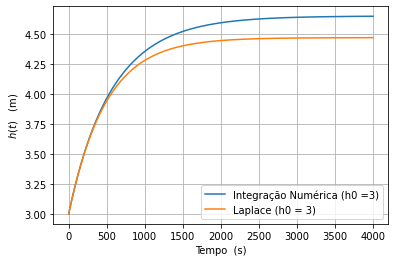

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#definindo a equação diferencial
def ode(y, t, R, r, Qe):
  h = y[0]
  dhdt = Qe / (pi*R**2) - (r**2/R**2) * (2 * g * h)**(.5) 
  return dhdt





#Definindo o vetor tempo
t = np.linspace(0,tf,1000)


#Calculando a resposta por método numérico e Laplace

y = odeint(ode,h0,t,args=(R,r,Qe))
y1 = y[:,0]

#Calculando a resposta por Laplace
A = pi * R**2
C = pi * r**2 * (2*g)**.5
K = (2 * (h0)**.5)/ C

tau = 2 * A * (h0)**.5 / C
L = Qe - Qebarra
y2 = K * L * (1-np.exp(-t/tau)) + h0
print(len(y2))
print(abs(y2[1000-1]-y1[1000-1]))

#Plotando a simulação
#versão 2
figure = plt.plot()
plt.plot(t,y1,label=f"Integração Numérica (h0 ={h0})")
plt.plot(t,y2,label=f"Laplace (h0 = {h0})")
plt.xlabel(r'Tempo  (s)', fontsize = 'medium')
plt.ylabel(r'$h(t)$   ($\mathrm{m}}$)', fontsize = 'medium')
plt.legend()
plt.grid()
plt.show

In [ ]:
a = r'$/frac{a}{b}$'
print(f"tentando {a} imprimir $$")

tentando $/frac{a}{b}$ imprimir $$


# Comparação entre modelo linear resolvido numericamente e oela transformada de laplace

In [ ]:
#Dados de entrada
# Constantes
w1 = 600
w2 = 200
x2 = 1
rho = 900
V = 2

#No regime Permanente
x1barra = 0.10
xbarra = (w1*x1barra+w2*x2)/(w1+w2)

#degrau
x1 = 0.8


tftanque = 30
n = 1001


1.4971743844682806e-09


<function matplotlib.pyplot.show(*args, **kw)>

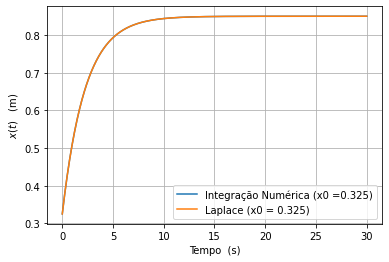

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#definindo a equação diferencial
def odetanque(y, t2):
  x = y[0]
  dxdt = (w1*x1+w2*x2-(w1+w2)*x)/(rho*V)
  return dxdt





#Definindo o vetor tempo
t2 = np.linspace(0,tftanque,n)


#Calculando a resposta por método numérico e Laplace

x = odeint(odetanque,xbarra,t2)
xnum = x[:,0]

#Calculando a resposta por Laplace
Ktanque =w1/(w1+w2)
tautanque = rho *V/(w1+w2)
Ltanque = x1 - x1barra
xlap = Ktanque * Ltanque * (1-np.exp(-t2/tautanque)) + xbarra
print(abs(xlap[n-1]-xnum[n-1]))

#Plotando a simulação

figure = plt.plot()
plt.plot(t2,xnum,label=f"Integração Numérica (x0 ={xbarra})")
plt.plot(t2,xlap,label=f"Laplace (x0 = {xbarra})")
plt.xlabel(r'Tempo  (s)', fontsize = 'medium')
plt.ylabel(r'$x(t)$   ($\mathrm{m}}$)', fontsize = 'medium')
plt.legend()
plt.grid()
plt.show

In [ ]:
print(xlap[n-1],xnum)